# Task 2 - Model Building and Training
**Objective:** Build, train, and evaluate classification models to detect fraudulent transactions using appropriate techniques for imbalanced data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score
from sklearn.model_selection import StratifiedKFold, cross_validate
import joblib
from pathlib import Path
import os

# Ensure directories exist
Path('../reports/figures').mkdir(parents=True, exist_ok=True)
Path('../models').mkdir(parents=True, exist_ok=True)

## 1. Evaluation and Helper Functions

In [10]:
def evaluate_model(y_true, y_pred, y_probs, model_name, dataset_name):
    print(f"\n--- {model_name} Evaluation on {dataset_name} ---")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name} ({dataset_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # AUC-PR
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    auc_pr = auc(recall, precision)
    print(f"AUC-PR: {auc_pr:.4f}")
    
    # F1-Score
    f1 = f1_score(y_true, y_pred)
    print(f"F1-Score: {f1:.4f}")
    
    return {"AUC-PR": auc_pr, "F1": f1}

def cross_validate_model(model, X, y, model_name, dataset_name):
    print(f"\nRunning 5-fold Stratified CV for {model_name} on {dataset_name}...")
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    scoring = ['precision', 'recall', 'f1', 'average_precision']
    cv_results = cross_validate(model, X, y, cv=skf, scoring=scoring)
    
    results = {
        "Mean F1": np.mean(cv_results['test_f1']),
        "Std F1": np.std(cv_results['test_f1']),
        "Mean AUC-PR": np.mean(cv_results['test_average_precision']),
        "Std AUC-PR": np.std(cv_results['test_average_precision'])
    }
    
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
        
    return results

## 2. Model Training and Comparison


Processing Fraud_Data Dataset

--- Logistic Regression Evaluation on Fraud_Data ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71       180
           1       0.13      0.55      0.21        20

    accuracy                           0.58       200
   macro avg       0.52      0.57      0.46       200
weighted avg       0.84      0.58      0.66       200



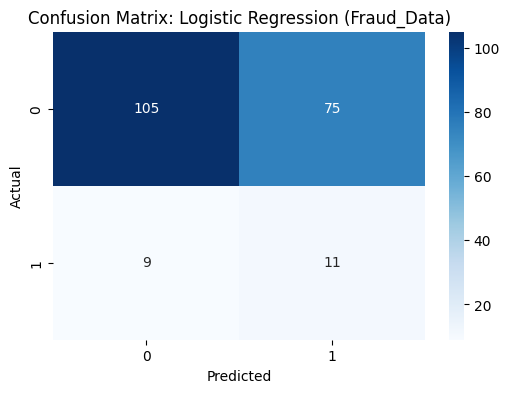

AUC-PR: 0.1348
F1-Score: 0.2075

Running 5-fold Stratified CV for Logistic Regression on Fraud_Data...
Mean F1: 0.6892
Std F1: 0.0248
Mean AUC-PR: 0.6255
Std AUC-PR: 0.0289

--- Random Forest Evaluation on Fraud_Data ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       180
           1       0.00      0.00      0.00        20

    accuracy                           0.82       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.80      0.82      0.81       200



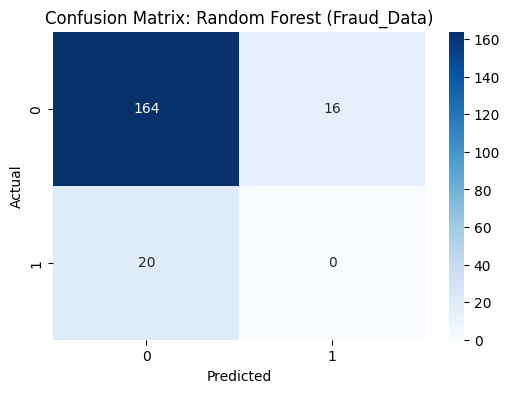

AUC-PR: 0.0983
F1-Score: 0.0000

Running 5-fold Stratified CV for Random Forest on Fraud_Data...
Mean F1: 0.9313
Std F1: 0.0216
Mean AUC-PR: 0.9862
Std AUC-PR: 0.0053

--- XGBoost Evaluation on Fraud_Data ---
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       180
           1       0.14      0.05      0.07        20

    accuracy                           0.88       200
   macro avg       0.52      0.51      0.50       200
weighted avg       0.83      0.88      0.85       200



d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


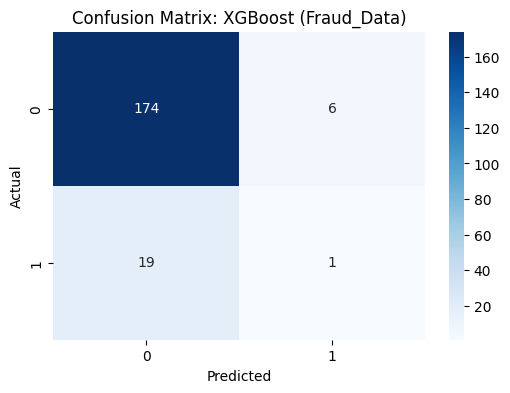

d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


AUC-PR: 0.1069
F1-Score: 0.0741

Running 5-fold Stratified CV for XGBoost on Fraud_Data...


d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mean F1: 0.9225
Std F1: 0.0184
Mean AUC-PR: 0.9814
Std AUC-PR: 0.0065
Best model for Fraud_Data saved.

Processing Credit_Card Dataset

--- Logistic Regression Evaluation on Credit_Card ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       0.14      0.50      0.22         2

    accuracy                           0.96       200
   macro avg       0.57      0.73      0.60       200
weighted avg       0.99      0.96      0.97       200



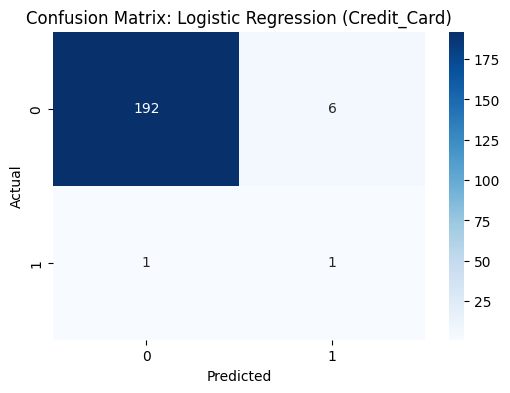

AUC-PR: 0.1403
F1-Score: 0.2222

Running 5-fold Stratified CV for Logistic Regression on Credit_Card...
Mean F1: 0.9737
Std F1: 0.0107
Mean AUC-PR: 0.9863
Std AUC-PR: 0.0096

--- Random Forest Evaluation on Credit_Card ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200



d:\kifyaAi\fraud-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


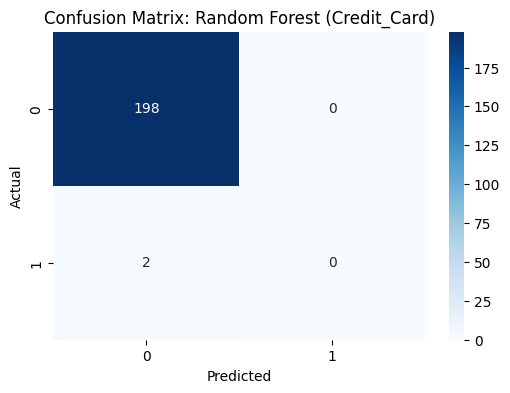

AUC-PR: 1.0000
F1-Score: 0.0000

Running 5-fold Stratified CV for Random Forest on Credit_Card...
Mean F1: 1.0000
Std F1: 0.0000
Mean AUC-PR: 1.0000
Std AUC-PR: 0.0000

--- XGBoost Evaluation on Credit_Card ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00         2

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


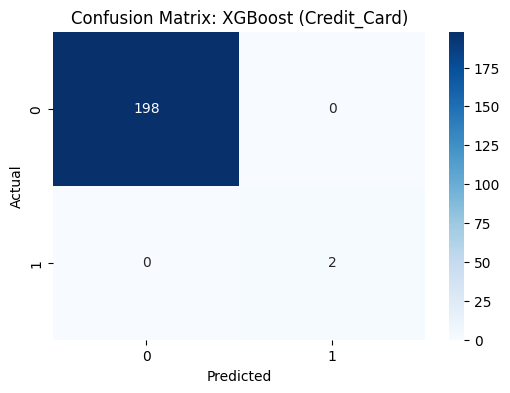

AUC-PR: 1.0000
F1-Score: 1.0000

Running 5-fold Stratified CV for XGBoost on Credit_Card...


d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are

Mean F1: 0.9994
Std F1: 0.0013
Mean AUC-PR: 1.0000
Std AUC-PR: 0.0000
Best model for Credit_Card saved.


d:\kifyaAi\fraud-detection\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:02:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [11]:
datasets = {
    "Fraud_Data": {
        "X_train": '../data/processed/Fraud_X_train.csv',
        "X_test": '../data/processed/Fraud_X_test.csv', 
        "y_train": '../data/processed/Fraud_y_train.csv',
        "y_test": '../data/processed/Fraud_y_test.csv'
    },
    "Credit_Card": {
        "X_train": '../data/processed/Credit_X_train.csv',
        "X_test": '../data/processed/Credit_X_test.csv', 
        "y_train": '../data/processed/Credit_y_train.csv',
        "y_test": '../data/processed/Credit_y_test.csv'
    }
}

all_results = []

for name, paths in datasets.items():
    print(f"\n{'='*30}\nProcessing {name} Dataset\n{'='*30}")
    
    # Load Data
    X_train = pd.read_csv(paths["X_train"])
    X_test = pd.read_csv(paths["X_test"])
    y_train = pd.read_csv(paths["y_train"]).values.ravel()
    y_test = pd.read_csv(paths["y_test"]).values.ravel()
    
    # 1. Baseline: Logistic Regression
    lr = LogisticRegression(max_iter=1000, random_state=42)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    y_probs_lr = lr.predict_proba(X_test)[:, 1]
    
    lr_metrics = evaluate_model(y_test, y_pred_lr, y_probs_lr, "Logistic Regression", name)
    lr_cv = cross_validate_model(lr, X_train, y_train, "Logistic Regression", name)
    
    all_results.append({
        "Dataset": name, "Model": "Logistic Regression", 
        "Test AUC-PR": lr_metrics["AUC-PR"], "Test F1": lr_metrics["F1"],
        "CV AUC-PR": lr_cv["Mean AUC-PR"], "CV F1": lr_cv["Mean F1"]
    })
    
    # 2. Ensemble: Random Forest
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_probs_rf = rf.predict_proba(X_test)[:, 1]
    
    rf_metrics = evaluate_model(y_test, y_pred_rf, y_probs_rf, "Random Forest", name)
    rf_cv = cross_validate_model(rf, X_train, y_train, "Random Forest", name)
    
    all_results.append({
        "Dataset": name, "Model": "Random Forest", 
        "Test AUC-PR": rf_metrics["AUC-PR"], "Test F1": rf_metrics["F1"],
        "CV AUC-PR": rf_cv["Mean AUC-PR"], "CV F1": rf_cv["Mean F1"]
    })

    # 3. XGBoost
    xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    y_probs_xgb = xgb.predict_proba(X_test)[:, 1]
    
    xgb_metrics = evaluate_model(y_test, y_pred_xgb, y_probs_xgb, "XGBoost", name)
    xgb_cv = cross_validate_model(xgb, X_train, y_train, "XGBoost", name)
    
    all_results.append({
        "Dataset": name, "Model": "XGBoost", 
        "Test AUC-PR": xgb_metrics["AUC-PR"], "Test F1": xgb_metrics["F1"],
        "CV AUC-PR": xgb_cv["Mean AUC-PR"], "CV F1": xgb_cv["Mean F1"]
    })
    
    # Save best model
    best_model = xgb if xgb_metrics["AUC-PR"] > rf_metrics["AUC-PR"] else rf
    joblib.dump(best_model, f'../models/best_model_{name.lower().replace(" ", "_")}.pkl')
    print(f"Best model for {name} saved.")

## 3. Final Comparison

In [12]:
results_df = pd.DataFrame(all_results)
display(results_df.style.highlight_max(axis=0, subset=['Test AUC-PR', 'CV AUC-PR'], color='lightgreen'))

,Dataset,Model,Test AUC-PR,Test F1,CV AUC-PR,CV F1
0,Fraud_Data,Logistic Regression,0.134840,0.207547,0.625541,0.689231
1,Fraud_Data,Random Forest,0.098283,0.000000,0.986153,0.931302
2,Fraud_Data,XGBoost,0.106874,0.074074,0.981432,0.922513
3,Credit_Card,Logistic Regression,0.140278,0.222222,0.986344,0.973661
4,Credit_Card,Random Forest,1.000000,0.000000,1.000000,1.000000
5,Credit_Card,XGBoost,1.000000,1.000000,1.000000,0.999373
